# Script containing drawn samples, test statistics, strategy, etc. for project 3

### Facts:
##### $\bullet$ There are 7 nodes 
##### $\bullet$ There is one hidden node
##### $\bullet$ H is a confounder for 2 of the other nodes
##### $\bullet$  The variables that H is a confounder for are NOT directly linked


##### $\bullet$ The file with no intervention 98 samples is called: "data_98_observational.csv" 

## General setup:
### Write down exactly what was done when sampling in a markdown cell above the code
### Do statistics

#### Imports

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import listdir
from os.path import isfile, join

import scipy.stats as st

#### Define functions

In [100]:
def load(filename):
    df = pd.read_csv('data/'+str(filename)).iloc[:,1:]
    data = df.to_numpy()
    return data, df
    
def load_as_df(filename):
    df = pd.read_csv('data/'+str(filename))
    df = df.drop(columns=['Unnamed: 0'])
    return df

def mean(A):
    return np.mean(A, axis=0)
def var(A):
    return np.var(A, axis=0)
def corM(df, method):
    return df.corr(method=method)

def ttest(vec1, vec2):
    return st.ttest_rec(vec1,vec2)[1]

In [101]:
a_raw, df_raw = load('data_98_observational.csv')
nodes = df_raw.columns

means = mean(a_raw)
vars = var(a_raw)

#### Load all data
Loads all the data into the dictionary of {filename: dataframe}

In [102]:
# Load all data into dictionary

# List all files in data folder with .csv extension
data_files = [f for f in listdir('data') if isfile(join('data', f)) if f.endswith(".csv")]
# Create dictionary of dataframes 
data_dict = {f[:-4]: load_as_df(f) for f in data_files}

# Suprress seaborn warnings


#### Generate plots

Generate scatterlot matrices for all the datasets

In [103]:
# Make all plots
for name, data in data_dict.items():
    sns.set(style="white", palette="muted", color_codes=True)
    g = sns.pairplot(data, kind="scatter",diag_kind="kde")
    g.fig.suptitle("Scatter matrix: " + name, y =1.01)
    g.savefig('plots/scatter_matrix_' + name + '.png')
    # plt.show()
    plt.close()
    print("Created file: " + 'plots/scatter_matrix_' + name + '.png')
    
    

C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_A0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_B0.16.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_C0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_D0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_E0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_50_F-0.5.png
Created file: plots/scatter_matrix_data_98_observational.png


Generate correlation matrices for all datafiles

In [81]:
for name, data in data_dict.items():
    # plot correlation matrix
    corr = data.corr()
    plt.figure(figsize=(10,10))
    plt.title('Correlation Matrix')
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu", annot=True)
    plt.savefig('plots/correlation_matrix_' + name + '.png')
    print("Created file: " + 'plots/correlation_matrix_' + name + '.png')

    plt.close()

    # plot spearman correlation matrix
    corr = data.corr(method='spearman')
    plt.figure(figsize=(10,10))
    plt.title('Spearman Correlation Matrix')
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu", annot=True)
    plt.savefig('plots/correlation_matrix_spearman_' + name + '.png')
    print("Created file: " + 'plots/correlation_matrix_spearman_' + name + '.png')

    plt.close()

Created file: plots/correlation_matrix_data_30_A0.png
Created file: plots/correlation_matrix_spearman_data_30_A0.png
Created file: plots/correlation_matrix_data_30_B0.16.png
Created file: plots/correlation_matrix_spearman_data_30_B0.16.png
Created file: plots/correlation_matrix_data_30_C0.png
Created file: plots/correlation_matrix_spearman_data_30_C0.png
Created file: plots/correlation_matrix_data_30_D0.png
Created file: plots/correlation_matrix_spearman_data_30_D0.png
Created file: plots/correlation_matrix_data_30_E0.png
Created file: plots/correlation_matrix_spearman_data_30_E0.png
Created file: plots/correlation_matrix_data_50_F-0.5.png
Created file: plots/correlation_matrix_spearman_data_50_F-0.5.png
Created file: plots/correlation_matrix_data_98_observational.png
Created file: plots/correlation_matrix_spearman_data_98_observational.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

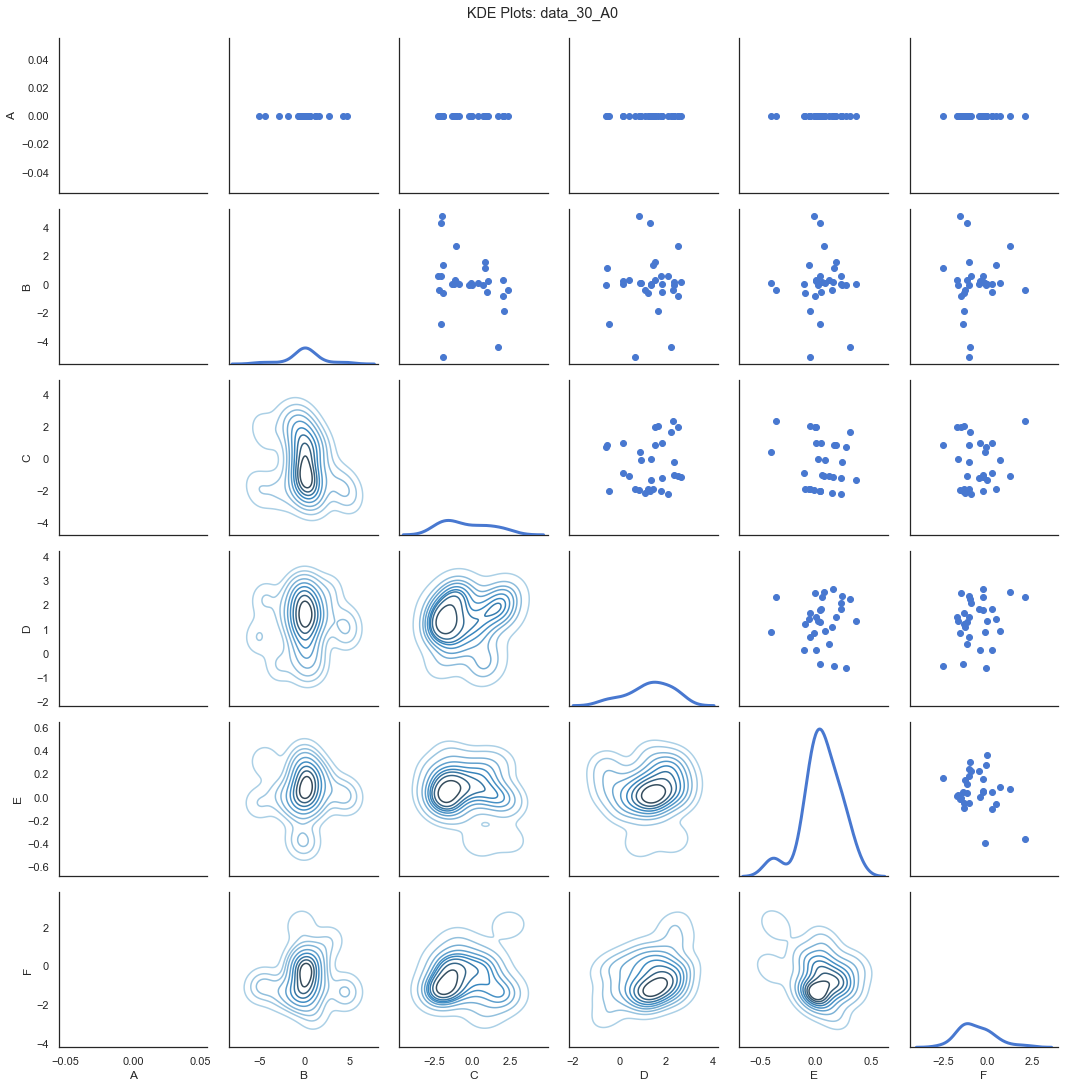

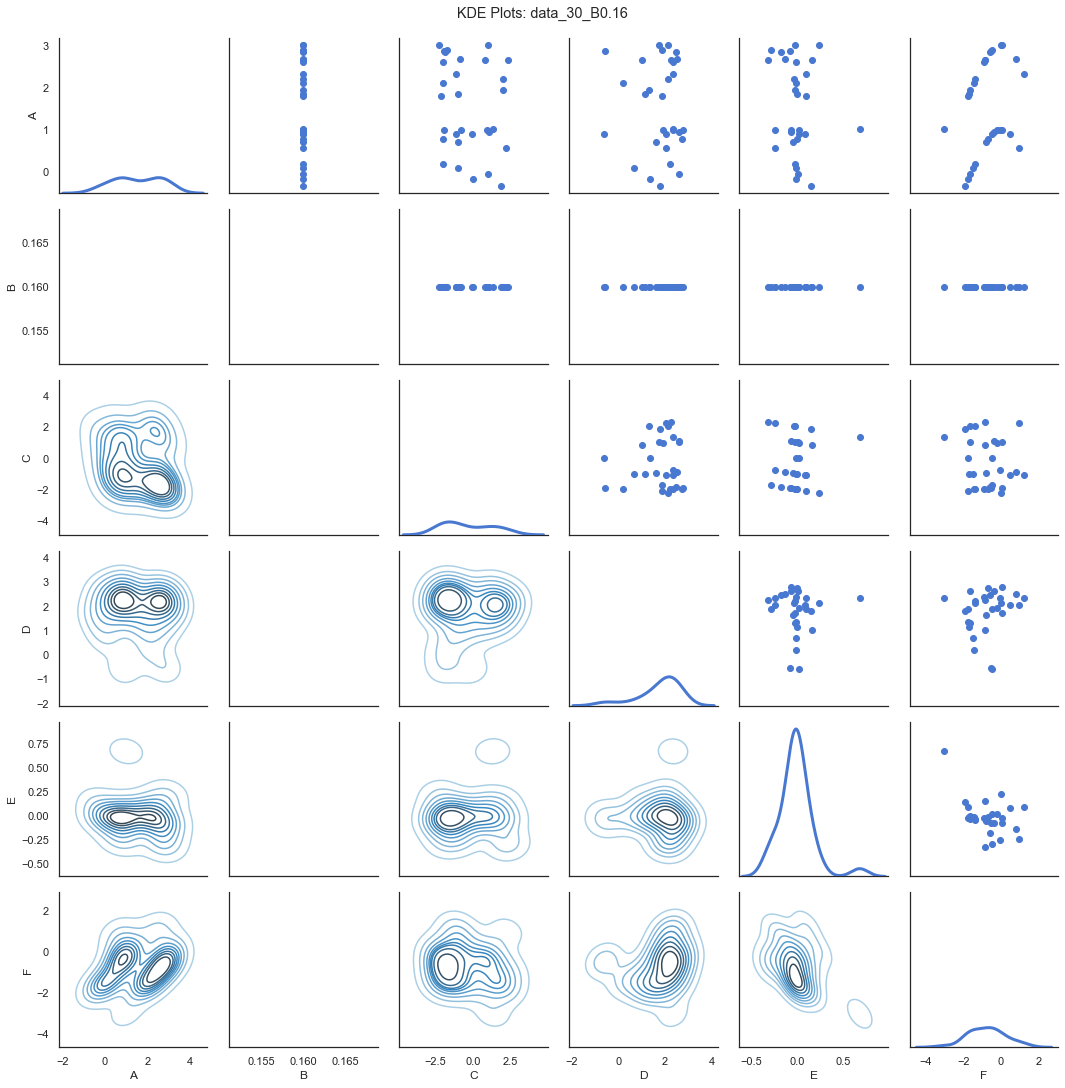

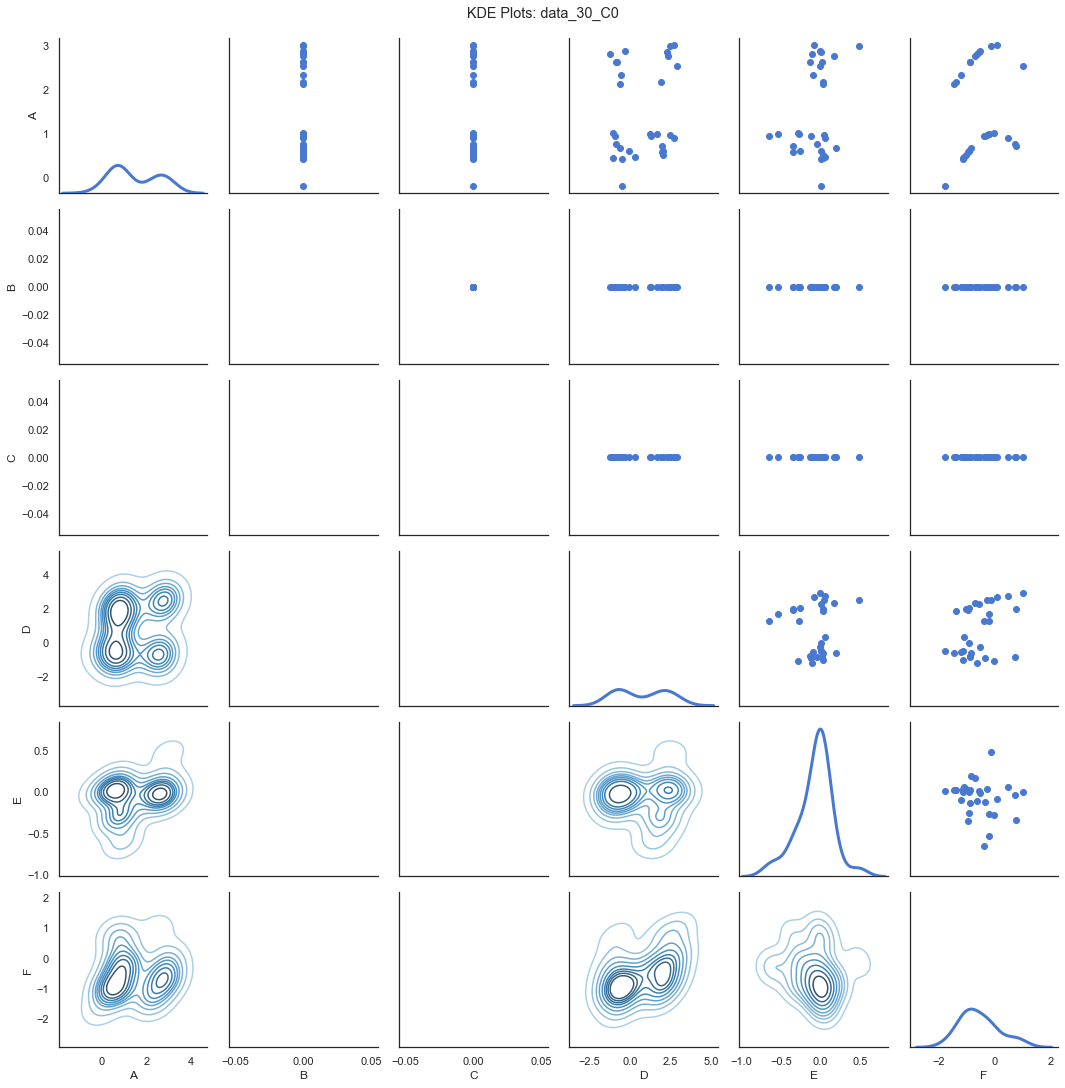

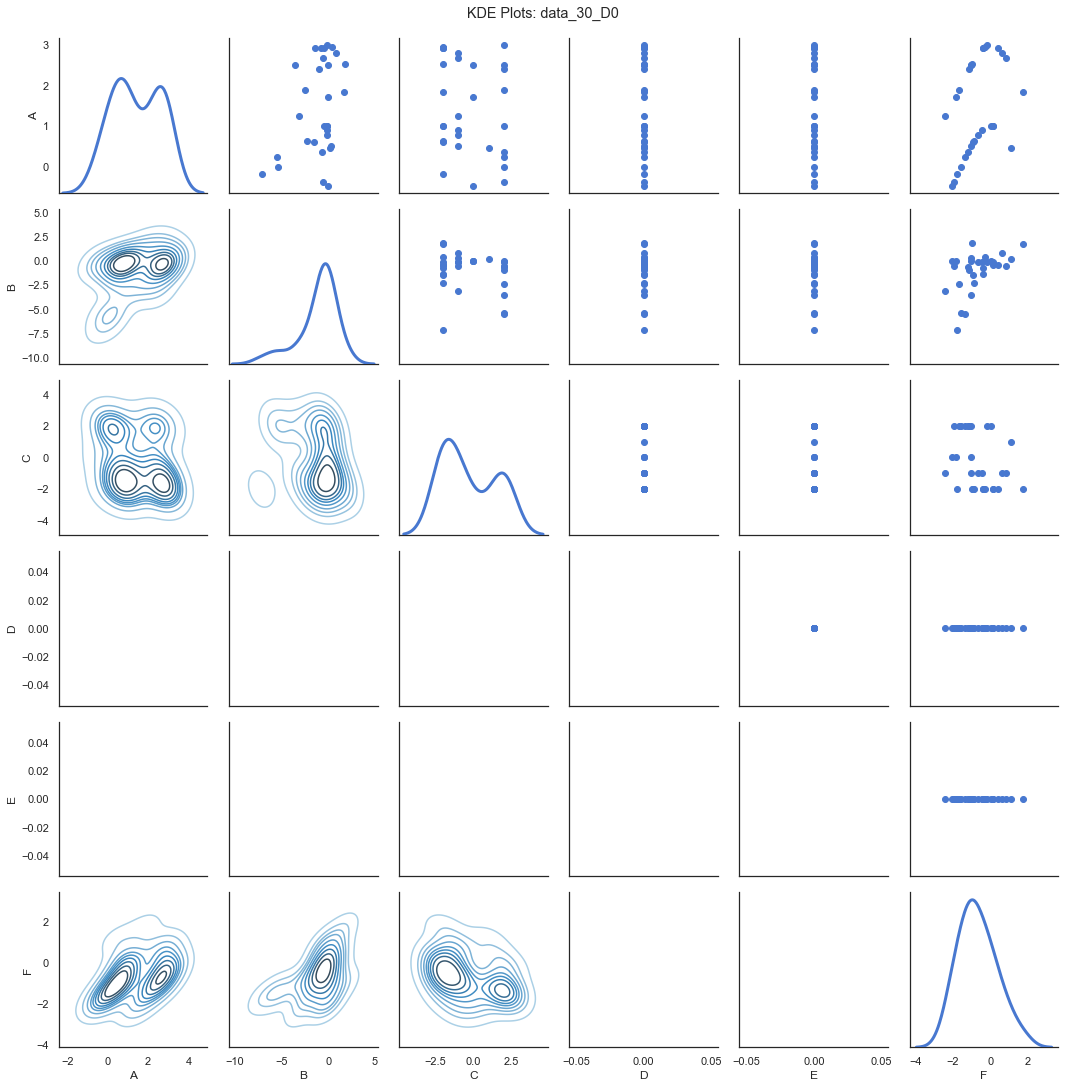

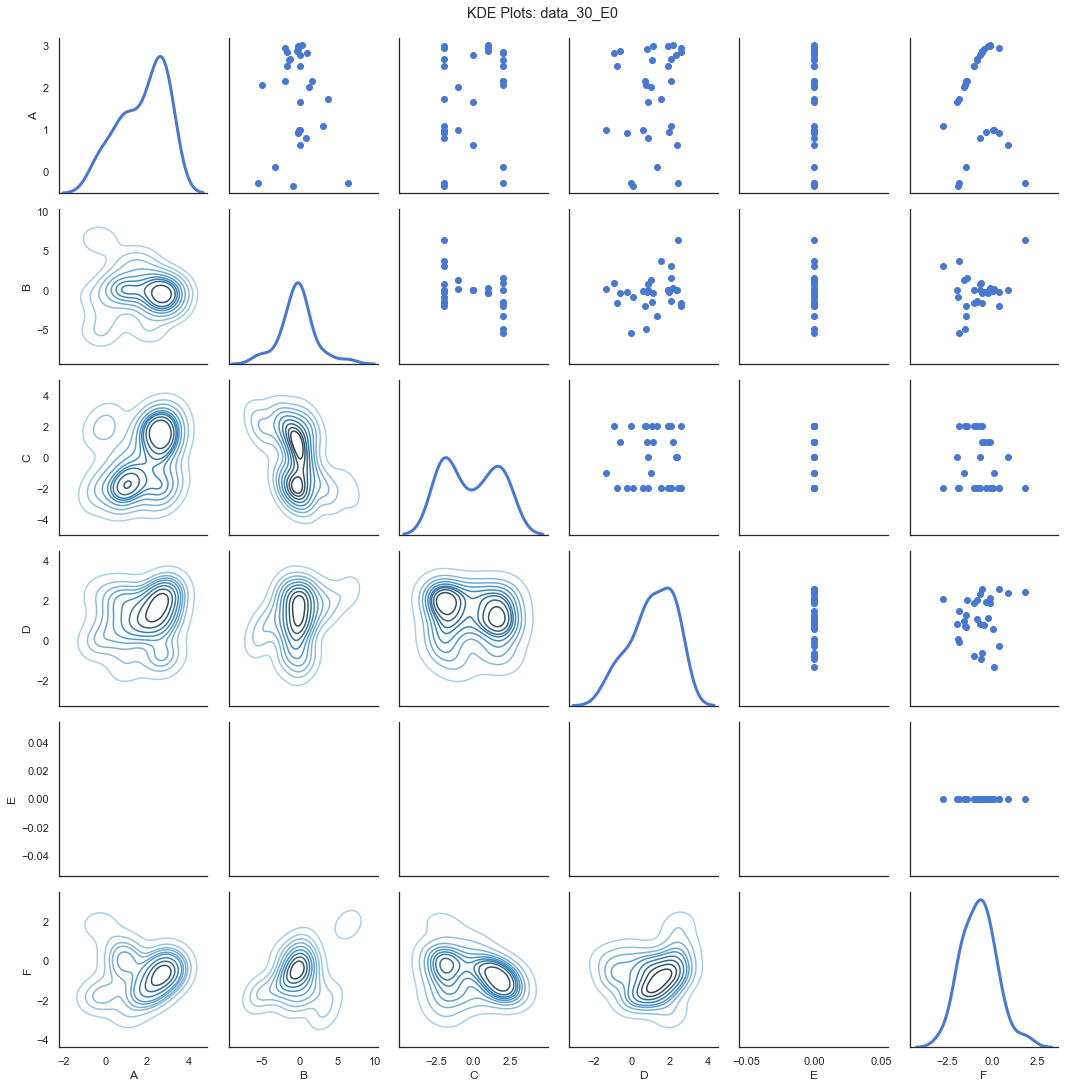

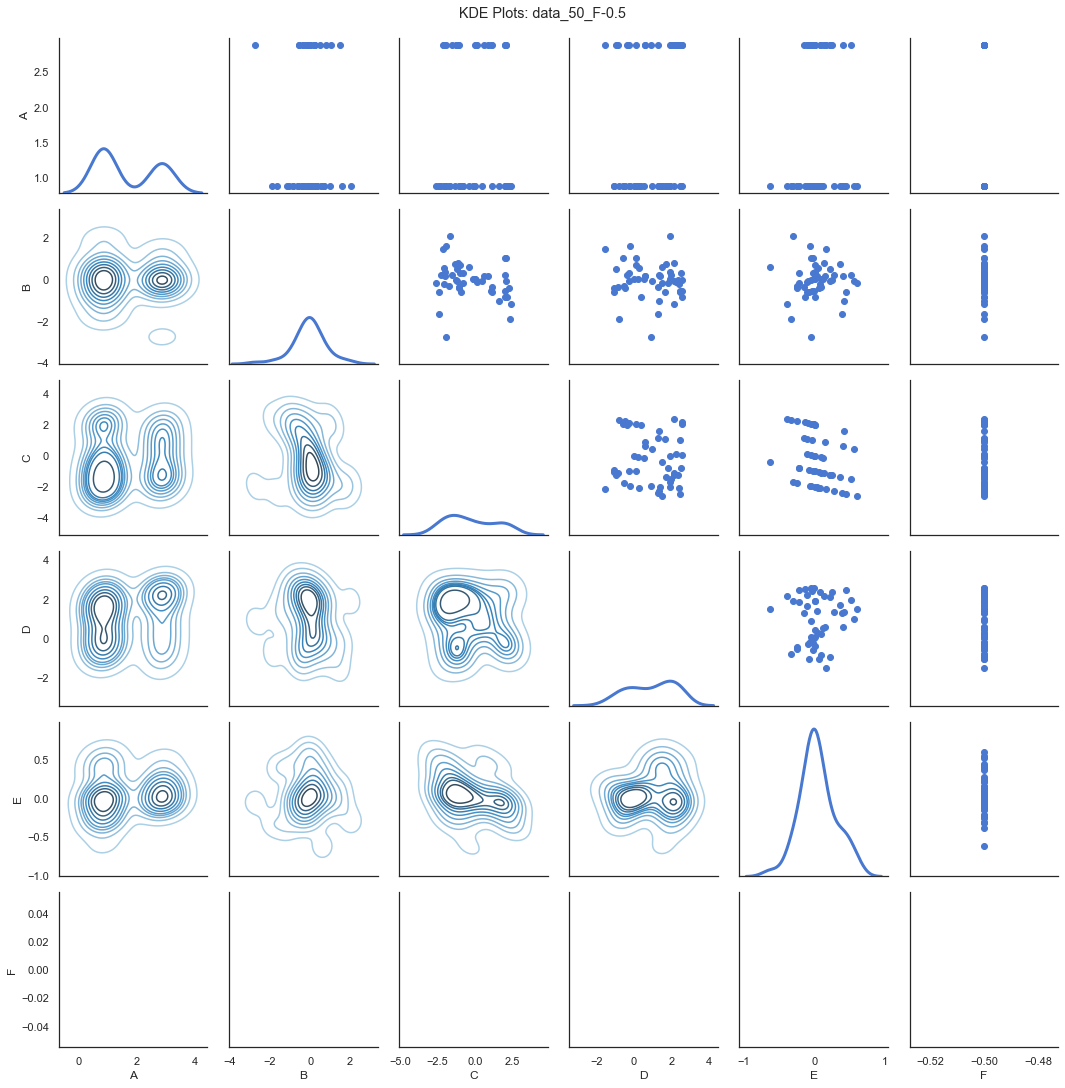

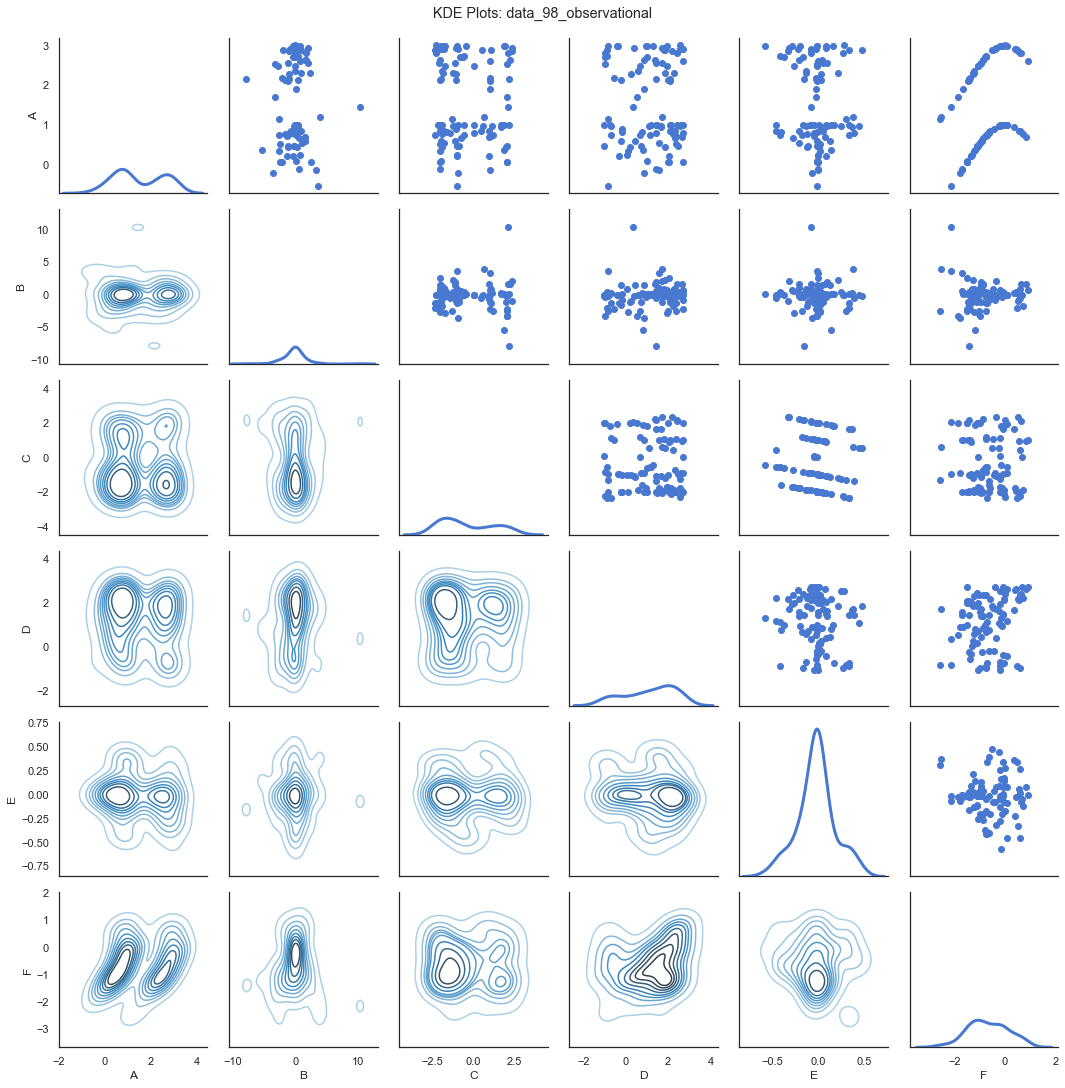

In [113]:
for name, data in data_dict.items():


    # Create grid of seaborn plots
    g = sns.PairGrid(data, diag_sharey=True)
    g.map_upper(plt.scatter)
    g.map_lower(sns.kdeplot, cmap="Blues_d")
    g.map_diag(sns.kdeplot, lw=3)
    g.fig.suptitle("KDE Plots: " + name, y =1.01)
    g.savefig('plots/kde_plots_' + name + '.png')
    # g.show()
    # plot multiple seaborn plots in on figure


    # print(data["A"])
    # sns.jointplot(data={'A':data["A"],'B':data["B"],'C':data["C"],'D':data["D"],'E':data["E"],'F':data["F"]},x='C',y='F',kind='kde')
    # break

In [115]:
data_dict["data_30_E0"]

,A,B,C,D,E,F
0,2.646735,-1.442187,2.0,1.082570,0.0,-0.867501
1,2.825770,0.971888,2.0,-0.947238,0.0,-0.599230
2,1.074725,3.096635,-2.0,2.063774,0.0,-2.752555
3,0.111394,-3.249177,2.0,1.305459,0.0,-1.459170
4,0.930421,-0.160210,-2.0,-0.256797,0.0,0.375236
5,2.762925,0.000000,0.0,2.327359,0.0,-0.702970
6,0.793550,0.816398,-2.0,0.824436,0.0,-0.654175
7,2.506755,0.092521,2.0,1.880354,0.0,-1.039380
8,2.142201,-1.953033,2.0,0.691997,0.0,-1.428112
9,2.973723,-0.264174,1.0,1.120800,0.0,-0.229752


#### Calculate statistics
Generate latex tables for mean and variance

In [95]:
# Create new empty dataframe
df_means = pd.DataFrame()
df_vars = pd.DataFrame()

for name, data in data_dict.items():
    # Calculate mean and variance of each node
    means = mean(data)
    vars = var(data)

    # add means to dataframe
    df_means[name + '_mean'] = means
    df_vars[name + '_var'] = vars

# Transpose dataframes
df_means = df_means.transpose()
df_vars = df_vars.transpose()

# Generate latex table
df_means.to_latex('tables_latex/means.tex')
df_vars.to_latex('tables_latex/vars.tex')

print(df_means)
print(df_vars)


                                   A         B         C         D         E  \
data_30_A0_mean             0.000000  0.039114 -0.389296  1.312622  0.055963   
data_30_B0.16_mean          1.527638  0.160000 -0.319727  1.778589 -0.013607   
data_30_C0_mean             1.464602  0.000000  0.000000  0.756588 -0.070316   
data_30_D0_mean             1.439067 -1.069356 -0.300000  0.000000  0.000000   
data_30_E0_mean             1.791457 -0.233166 -0.133333  1.096928  0.000000   
data_50_F-0.5_mean          1.677583 -0.052146 -0.283903  0.934250  0.043903   
data_98_observational_mean  1.492477 -0.183032 -0.388332  1.145678 -0.019831   

                                   F  
data_30_A0_mean            -0.616436  
data_30_B0.16_mean         -0.746649  
data_30_C0_mean            -0.553688  
data_30_D0_mean            -0.682265  
data_30_E0_mean            -0.741256  
data_50_F-0.5_mean         -0.500000  
data_98_observational_mean -0.668970  
                                  A            

In [152]:

df_ttest = pd.DataFrame(np.zeros((len(data_dict.keys()),6)))
df_ttest.index = data_dict.keys()
df_ttest.columns = ['A','B','C','D','E','F']

for name, data in data_dict.items():
    # Calculate mean and variance of each node
    # means = mean(data)

    for column in data.columns:
        # print(column)

        p_val = st.ttest_ind(data_dict["data_98_observational"][column],data_dict[name][column]).pvalue
        df_ttest[column][name] = 1 if p_val < 0.05 else 0
        df_ttest[column][name] = p_val


df_ttest.to_latex('tables_latex/p_values.tex')



In [71]:
corM(df_raw, 'pearson')


,A,B,C,D,E,F
A,1.000000,0.012504,0.011811,-0.040499,-0.098900,0.291625
B,0.012504,1.000000,-0.036013,0.080270,0.002359,0.001877
C,0.011811,-0.036013,1.000000,-0.001786,-0.030384,-0.016201
D,-0.040499,0.080270,-0.001786,1.000000,-0.103230,0.247807
E,-0.098900,0.002359,-0.030384,-0.103230,1.000000,-0.064318
F,0.291625,0.001877,-0.016201,0.247807,-0.064318,1.000000


In [72]:
corM(df_raw, 'spearman')

,A,B,C,D,E,F
A,1.000000,0.074371,0.018483,-0.032101,-0.092886,0.387857
B,0.074371,1.000000,-0.034065,0.167480,-0.024820,0.128793
C,0.018483,-0.034065,1.000000,-0.014594,-0.196654,-0.046280
D,-0.032101,0.167480,-0.014594,1.000000,-0.110163,0.272141
E,-0.092886,-0.024820,-0.196654,-0.110163,1.000000,-0.038005
F,0.387857,0.128793,-0.046280,0.272141,-0.038005,1.000000


In [73]:
df_raw.describe()

,A,B,C,D,E,F
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,1.492477,-0.183032,-0.388332,1.145678,-0.019831,-0.668970
std,1.053181,1.998687,1.544932,1.170557,0.203124,0.781923
min,-0.548616,-7.885692,-2.339222,-1.035836,-0.576186,-2.585362
25%,0.721823,-1.035442,-1.870859,0.285727,-0.122503,-1.243673
50%,0.997897,-0.023420,-0.955102,1.432536,-0.014553,-0.742486
75%,2.598267,0.375455,1.020799,2.108453,0.069367,-0.086572
max,2.999937,10.306302,2.330058,2.721275,0.480917,0.916239


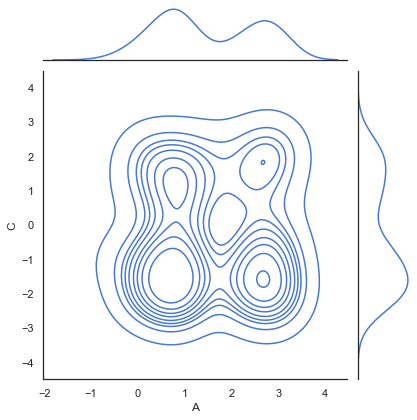

In [104]:
df = df_raw
A = df["A"]
B = df["B"]
C = df["C"]
D = df["D"]
E = df["E"]
F = df["F"]
# sns.jointplot(data={'A':A,'B':B},x='A',y='B',kind='kde')
# sns.jointplot(data={'A':A,'C':C},x='A',y='C',kind='kde')
# sns.jointplot(data={'A':A,'D':D},x='A',y='D',kind='kde')
# sns.jointplot(data={'A':A,'E':E},x='A',y='E',kind='kde')
# sns.jointplot(data={'A':A,'F':F},x='A',y='F',kind='kde')

#sns.jointplot(data={'B':B,'C':C},x='B',y='C',kind='kde')
#sns.jointplot(data={'C':C,'D':D},x='C',y='D',kind='kde')
#sns.jointplot(data={'D':D,'E':E},x='D',y='E',kind='kde')
#sns.jointplot(data={'E':E,'F':F},x='E',y='F',kind='kde')


# Joint plot matrix
# sns.jointplot(data={'A':A,'B':B,'C':C,'D':D,'E':E,'F':F},x='A',y='B',kind='kde')
sns.jointplot(data={'A':A,'B':B,'C':C,'D':D,'E':E,'F':F},x='A',y='C',kind='kde')


In [81]:
a_raw_r = np.round(a_raw,2)

df_raw.cov()

,A,B,C,D,E,F
A,1.109191,0.026320,0.019218,-0.049928,-0.021157,0.240156
B,0.026320,3.994748,-0.111202,0.187797,0.000958,0.002934
C,0.019218,-0.111202,2.386815,-0.003230,-0.009535,-0.019571
D,-0.049928,0.187797,-0.003230,1.370205,-0.024545,0.226815
E,-0.021157,0.000958,-0.009535,-0.024545,0.041259,-0.010216
F,0.240156,0.002934,-0.019571,0.226815,-0.010216,0.611404


In [80]:
p_values = []
for i in range(len(nodes)):
    ttest(a_raw, a_iF)

0.9748022225075905